In [1]:
import pandas as pd

# Load property and customer data
property_data = pd.read_csv('property1.csv')
customer_data = pd.read_csv('customer1.csv')

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

In [2]:
# Print column headers for property_data
print("Column headers for property_data:")
print(property_data.columns)

# Print column headers for customer_data
print("\nColumn headers for customer_data:")
print(customer_data.columns)

Column headers for property_data:
Index(['SRN', 'id', 'building', 'date_sale', 'type', 'propertyNumber', 'area',
       'price', 'status', 'customerID'],
      dtype='object')

Column headers for customer_data:
Index(['SRN', 'customerID', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [3]:
# Convert 'customerID' to string and remove leading/trailing spaces
property_data['customerID'] = property_data['customerID'].astype(str).str.strip()
customer_data['customerID'] = customer_data['customerID'].astype(str).str.strip()

# Merge again
merged_data = pd.merge(property_data, customer_data, on='customerID', how='inner')

# Display the merged dataframe
print("Merged Dataframe:")
print(merged_data)


Merged Dataframe:
     SRN_x    id  building  date_sale       type  propertyNumber     area  \
0        0  1030         1  11/1/2005  Apartment              30   743.09   
1        1  1029         1  10/1/2005  Apartment              29   756.21   
2        2  2002         2   7/1/2007  Apartment               2   587.28   
3        3  2031         2  12/1/2007  Apartment              31  1604.75   
4        4  1049         1  11/1/2004  Apartment              49  1375.45   
..     ...   ...       ...        ...        ...             ...      ...   
190    191  1022         1   7/1/2005  Apartment              22   743.09   
191    192  1028         1   7/1/2005  Apartment              28  1160.36   
192    193  1034         1   7/1/2005  Apartment              34   625.80   
193    194  1037         1   7/1/2005  Apartment              37   756.21   
194    195  1042         1   7/1/2005  Apartment              42   625.80   

            price  status customerID  ...        name   s

In [4]:
# Drop the 'id' column from the merged dataframe
merged_data = merged_data.drop('id', axis=1)

# Drop the unwanted columns
merged_data = merged_data.drop(['SRN_y', 'SRN_x'], axis=1)

# Sanity check
print("Shape of merged dataframe:", merged_data.shape)

# Display the merged dataframe
print("Merged Dataframe:")
print(merged_data)

Shape of merged dataframe: (195, 19)
Merged Dataframe:
     building  date_sale       type  propertyNumber     area         price  \
0           1  11/1/2005  Apartment              30   743.09  $246,172.68    
1           1  10/1/2005  Apartment              29   756.21  $246,331.90    
2           2   7/1/2007  Apartment               2   587.28  $209,280.91    
3           2  12/1/2007  Apartment              31  1604.75  $452,667.01    
4           1  11/1/2004  Apartment              49  1375.45  $467,083.31    
..        ...        ...        ...             ...      ...           ...   
190         1   7/1/2005  Apartment              22   743.09  $210,745.17    
191         1   7/1/2005  Apartment              28  1160.36  $331,154.88    
192         1   7/1/2005  Apartment              34   625.80  $204,434.68    
193         1   7/1/2005  Apartment              37   756.21  $189,194.31    
194         1   7/1/2005  Apartment              42   625.80  $204,027.09    

     sta

In [5]:
# Descriptive statistics
property_data.describe()
customer_data.describe()


,SRN,deal_satisfaction
count,162.000000,162.000000
mean,80.500000,3.456790
std,46.909487,1.333276
min,0.000000,1.000000
25%,40.250000,3.000000
50%,80.500000,4.000000
75%,120.750000,5.000000
max,161.000000,5.000000


In [6]:
# Missing values
property_data.isna().sum()
customer_data.isna().sum()

SRN                  0
customerID           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [7]:
# Data types
property_data.dtypes
customer_data.dtypes

SRN                   int64
customerID           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [8]:
# Filter columns with non-numeric (categorical) data types
categorical_columns_merged_data = merged_data.select_dtypes(include=['object']).columns

In [9]:
# Print the list of categorical columns for merged_data
print("Categorical Columns in merged_data:")
print(categorical_columns_merged_data)

Categorical Columns in merged_data:
Index(['date_sale', 'type', 'price', 'status', 'customerID', 'entity', 'name',
       'surname', 'birth_date', 'sex', 'country', 'state', 'purpose',
       'mortgage', 'source'],
      dtype='object')


In [10]:
# Specify the date columns to be transformed
date_columns = ['date_sale']
# Convert the specified date columns to datetime
property_data[date_columns] = property_data[date_columns].apply(pd.to_datetime, errors='coerce')

# Check the data types after transformation
print(property_data.dtypes)


SRN                        int64
id                         int64
building                   int64
date_sale         datetime64[ns]
type                      object
propertyNumber             int64
area                     float64
price                     object
status                    object
customerID                object
dtype: object


In [11]:
# Specify the date columns to be transformed
date_columns = ['birth_date']

# Convert the specified date columns to datetime
customer_data[date_columns] = customer_data[date_columns].apply(pd.to_datetime, errors='coerce')

# Check the data types after transformation
print(customer_data.dtypes)

SRN                           int64
customerID                   object
entity                       object
name                         object
surname                      object
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                     object
source                       object
dtype: object


In [12]:
# Check the data types of 'customerID' in the datasets
print("Data type of 'customerID' in merged_data:", merged_data['customerID'].dtype)

# Check for unique values and consistency
unique_merged_data = merged_data['customerID'].unique()

# Check for missing values
missing_merged_data = merged_data['customerID'].isna().sum()

print("\nUnique values in 'customerID' for merged_data:", unique_merged_data)

print("\nMissing values in 'customerID' for merged_data:", missing_merged_data)

Data type of 'customerID' in merged_data: object

Unique values in 'customerID' for merged_data: ['C0028' 'C0027' 'C0112' 'C0160' 'C0014' 'C0125' 'C0166' 'C0034' 'C0170'
 'C0009' 'C0041' 'C0057' 'C0061' 'C0089' 'C0159' 'C0171' 'C0042' 'C0093'
 'C0051' 'C0064' 'C0128' 'C0019' 'C0037' 'C0127' 'C0018' 'C0040' 'C0080'
 'C0083' 'C0085' 'C0091' 'C0007' 'C0048' 'C0065' 'C0096' 'C0164' 'C0038'
 'C0087' 'C0142' 'C0015' 'C0122' 'C0017' 'C0020' 'C0086' 'C0150' 'C0156'
 'C0169' 'C0022' 'C0072' 'C0136' 'C0149' 'C0011' 'C0073' 'C0110' 'C0111'
 'C0123' 'C0070' 'C0075' 'C0076' 'C0105' 'C0135' 'C0153' 'C0047' 'C0060'
 'C0066' 'C0068' 'C0090' 'C0095' 'C0151' 'C0162' 'C0010' 'C0054' 'C0056'
 'C0081' 'C0084' 'C0016' 'C0035' 'C0062' 'C0099' 'C0114' 'C0006' 'C0053'
 'C0069' 'C0077' 'C0168' 'C0058' 'C0107' 'C0131' 'C0144' 'C0098' 'C0130'
 'C0141' 'C0067' 'C0082' 'C0113' 'C0132' 'C0137' 'C0155' 'C0163' 'C0039'
 'C0071' 'C0101' 'C0146' 'C0052' 'C0063' 'C0088' 'C0094' 'C0165' 'C0044'
 'C0157' 'C0118' 'C0119' 'C

In [13]:
# Check for duplicate rows based on 'customerID' in merged_data
duplicates_merged_data = merged_data.duplicated(subset='customerID')

# Remove duplicate rows in merged_data
merged_data = merged_data.drop_duplicates(subset='customerID')

# Reset the index of themerged_data DataFrame
merged_data.reset_index(drop=True, inplace=True)

# Check the shape (number of rows and columns) of the merged DataFrame
print("Shape of merged_data:", merged_data.shape)

Shape of merged_data: (162, 19)


In [14]:
#Descriptive Statistics
numerical_stats = merged_data.describe()
print(numerical_stats)

         building  propertyNumber         area  deal_satisfaction
count  162.000000      162.000000   162.000000         162.000000
mean     2.604938       27.598765   905.984012           3.456790
std      1.257811       14.993357   265.838837           1.333276
min      1.000000        1.000000   410.710000           1.000000
25%      2.000000       15.000000   743.170000           3.000000
50%      2.000000       28.000000   792.530000           4.000000
75%      3.000000       39.750000  1057.920000           5.000000
max      5.000000       59.000000  1942.500000           5.000000


In [15]:
column_names = merged_data.columns
print(column_names)

Index(['building', 'date_sale', 'type', 'propertyNumber', 'area', 'price',
       'status', 'customerID', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [16]:
# Remove currency symbols (e.g., '$') and commas from the 'price' column
merged_data['price'] = merged_data['price'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate the total sales
total_sales = merged_data['price'].sum()

# Print the total sales
print(f'Total Sales: ${total_sales:.2f}')


Total Sales: $43933855.34


In [17]:
# Group the merged data by 'type'
building_type_performance = merged_data.groupby('type').agg({
    'price': 'sum',  # Calculate total sales (sum of prices)
    'deal_satisfaction': 'mean'  # Calculate average deal satisfaction
})

In [18]:
# Rename the columns for clarity
building_type_performance = building_type_performance.rename(columns={
    'price': 'Total Sales',
    'deal_satisfaction': 'Average Deal Satisfaction'
})

In [19]:
# Format the 'Total Sales' column as currency
building_type_performance['Total Sales'] = building_type_performance['Total Sales'].apply(lambda x: '${:,.2f}'.format(x))

# Display the result in a tabular format
print("Sales and Overall Performance by Building Type:")
print(building_type_performance)

Sales and Overall Performance by Building Type:
              Total Sales  Average Deal Satisfaction
type                                                
Apartment  $42,671,554.37                   3.433121
Office      $1,262,300.97                   4.200000


In [20]:
# Examine the number of building types in the data set
building_types = merged_data['building'].unique()
num_building_types = len(building_types)
print(f"Number of Building Types: {num_building_types}")
print("Building Types:", building_types)

Number of Building Types: 5
Building Types: [1 2 3 4 5]


In [21]:
# Totals breakdown by country
columns_totals_country = ['country', 'status', 'mortgage']
totals_by_country = merged_data[columns_totals_country].groupby('country').agg({
    'status': lambda x: list(x.unique()),  # Create a list of unique statuses within the group
    'mortgage': 'count'  # Count the number of 'Yes' values for 'mortgage'
}).rename(columns={'mortgage': 'mortgaged_properties'})

# Display the country for each group
country_types = merged_data[['country']].drop_duplicates().set_index('country')
totals_by_country = totals_by_country.join(country_types)

print("\nTotals Breakdown by Country:")
print(totals_by_country)



Totals Breakdown by Country:
           status  mortgaged_properties
country                                
Belgium  [ Sold ]                     2
Canada   [ Sold ]                     1
Denmark  [ Sold ]                     1
Germany  [ Sold ]                     1
Mexico   [ Sold ]                     1
Russia   [ Sold ]                     4
UK       [ Sold ]                     2
USA      [ Sold ]                   146
USA      [ Sold ]                     4


In [22]:
# Totals breakdown by building type
columns_totals = ['building', 'status', 'mortgage', 'type']
totals_by_building = merged_data[columns_totals].groupby(['building', 'type']).agg({
    'status': lambda x: ', '.join(x.unique()),  # Concatenate unique 'status' values
    'mortgage': 'count'  # Count the number of 'Yes' values for 'mortgage'
}).rename(columns={'mortgage': 'mortgaged_properties'})

print("\nTotals Breakdown by Building Type:")
print(totals_by_building)



Totals Breakdown by Building Type:
                    status  mortgaged_properties
building type                                   
1        Apartment   Sold                     31
         Office      Sold                      5
2        Apartment   Sold                     47
3        Apartment   Sold                     41
4        Apartment   Sold                     21
5        Apartment   Sold                     17


In [23]:
# Check unique values in the 'status' column
unique_statuses = merged_data['status'].unique()

# Display the unique statuses
print("Unique Statuses in merged_data:")
print(unique_statuses)


Unique Statuses in merged_data:
[' Sold ']


In [24]:
# Totals breakdown by country
columns_totals_country = ['country', 'purpose', 'source', 'mortgage']
totals_by_country = merged_data[columns_totals_country].groupby('country').agg({
    'purpose': lambda x: list(x.unique()),  # Create a list of unique purposes within the group
    'source': lambda x: list(x.unique()),  # Create a list of unique sources within the group
    'mortgage': 'count'  # Count the number of 'Yes' values for 'mortgage'
}).rename(columns={'mortgage': 'mortgaged_properties'})

# Display the country for each group
country_types = merged_data[['country']].drop_duplicates().set_index('country')
totals_by_country = totals_by_country.join(country_types)

print("\nTotals Breakdown by Country:")
print(totals_by_country)


Totals Breakdown by Country:
                    purpose                     source  mortgaged_properties
country                                                                     
Belgium  [Home, Investment]          [Agency, Website]                     2
Canada         [Investment]                  [Website]                     1
Denmark        [Investment]                   [Agency]                     1
Germany        [Investment]                   [Agency]                     1
Mexico               [Home]                   [Agency]                     1
Russia   [Home, Investment]          [Agency, Website]                     4
UK             [Investment]                   [Agency]                     2
USA      [Home, Investment]  [Website, Client, Agency]                   146
USA      [Home, Investment]          [Website, Agency]                     4


In [25]:
# Totals breakdown by state
columns_totals_state = ['state', 'mortgage', 'price', 'sex']
totals_by_state = merged_data[columns_totals_state].groupby('state').agg({
    'mortgage': 'count',  # Count the number of entries for each state
    'price': 'sum',  # Calculate the total price for each state
    'sex': lambda x: x.value_counts().idxmax() if not x.empty else None  # Get the mode (most common) value for 'sex'
}).rename(columns={'mortgage': 'total_properties'})

# Calculate the relative frequency
totals_by_state['relative_frequency'] = totals_by_state['total_properties'] / totals_by_state['total_properties'].sum()

# Calculate the cumulative frequency
totals_by_state['cumulative_frequency'] = totals_by_state['relative_frequency'].cumsum()

# Round the 'relative_frequency' and 'cumulative_frequency' to two decimal places
totals_by_state[['relative_frequency', 'cumulative_frequency']] = totals_by_state[['relative_frequency', 'cumulative_frequency']].round(2)

# Display the breakdown by state
print("\nTotals Breakdown by State:")
print(totals_by_state)



Totals Breakdown by State:
            total_properties        price sex  relative_frequency  \
state                                                               
Arizona                   10   2543965.20   M                0.06   
California               100  28415287.60   M                0.65   
Colorado                  11   2570287.08   M                0.07   
Kansas                     1    252185.99   M                0.01   
Nevada                    14   3858206.74   M                0.09   
Oregon                     9   2149158.40   F                0.06   
Utah                       5   1188776.40   M                0.03   
Virginia                   3    648055.92   F                0.02   
Wyoming                    1    204286.67   M                0.01   

            cumulative_frequency  
state                             
Arizona                     0.06  
California                  0.71  
Colorado                    0.79  
Kansas                      0.79  
Ne

In [29]:
#Analyzing Age
# Convert 'birth_date' and 'date_sale' to datetime format 

import numpy as np

merged_data['birth_date'] = pd.to_datetime(merged_data['birth_date'])
merged_data['date_sale'] = pd.to_datetime(merged_data['date_sale'])

# Calculate Age
merged_data['age_at_purchase'] = (merged_data['date_sale'] - merged_data['birth_date'])// pd.Timedelta(days=365.25)

# Step 2: Display the updated columns
print("Columns in updated merged_data:")
print(merged_data.columns)

# Display the DataFrame with the new 'age_at_purchase' column
print("\nUpdated merged_data with Age at Purchase:")
print(merged_data[['customerID', 'birth_date', 'date_sale', 'age_at_purchase']])


Columns in updated merged_data:
Index(['building', 'date_sale', 'type', 'propertyNumber', 'area', 'price',
       'status', 'customerID', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source', 'age_at_purchase'],
      dtype='object')

Updated merged_data with Age at Purchase:
    customerID birth_date  date_sale  age_at_purchase
0        C0028 1986-06-21 2005-11-01             19.0
1        C0027 1983-02-24 2005-10-01             22.0
2        C0112 1985-12-27 2007-07-01             21.0
3        C0160 1985-12-27 2007-12-01             21.0
4        C0014 1979-05-15 2004-11-01             25.0
..         ...        ...        ...              ...
157      C0025        NaT 2005-09-01              NaN
158      C0029        NaT 2005-12-01              NaN
159      C0055        NaT 2006-10-01              NaN
160      C0121        NaT 2004-03-01              NaN
161      C0174        NaT 2005-07-01         

In [30]:
# Define the updated age intervals
age_intervals_updated = [18.0, 25.0, 31.0, 36.0, 42.0, 48.0, 54.0, 59.0, 65.0, 71.0, 77.0]

# Create labels for the updated intervals
age_labels_updated = [
    "(18.0, 25.0]",
    "(25.0, 31.0]",
    "(31.0, 36.0]",
    "(36.0, 42.0]",
    "(42.0, 48.0]",
    "(48.0, 54.0]",
    "(54.0, 59.0]",
    "(59.0, 65.0]",
    "(65.0, 71.0]",
    "(71.0, 77.0]",
]

# Create a new column 'age_interval' based on the updated intervals
merged_data['age_interval'] = pd.cut(merged_data['age_at_purchase'], bins=age_intervals_updated, labels=age_labels_updated, right=False)

# Display the updated DataFrame with age intervals
print("Updated merged_data with Updated Age Intervals:")
print(merged_data[['customerID', 'birth_date', 'date_sale', 'age_at_purchase', 'age_interval']])



Updated merged_data with Updated Age Intervals:
    customerID birth_date  date_sale  age_at_purchase  age_interval
0        C0028 1986-06-21 2005-11-01             19.0  (18.0, 25.0]
1        C0027 1983-02-24 2005-10-01             22.0  (18.0, 25.0]
2        C0112 1985-12-27 2007-07-01             21.0  (18.0, 25.0]
3        C0160 1985-12-27 2007-12-01             21.0  (18.0, 25.0]
4        C0014 1979-05-15 2004-11-01             25.0  (25.0, 31.0]
..         ...        ...        ...              ...           ...
157      C0025        NaT 2005-09-01              NaN           NaN
158      C0029        NaT 2005-12-01              NaN           NaN
159      C0055        NaT 2006-10-01              NaN           NaN
160      C0121        NaT 2004-03-01              NaN           NaN
161      C0174        NaT 2005-07-01              NaN           NaN

[162 rows x 5 columns]


In [35]:
# Group by age intervals and calculate the number of properties sold in each interval
age_interval_summary = merged_data.groupby('age_interval')['propertyNumber'].count().reset_index()

# Rename the columns for clarity
age_interval_summary.columns = ['Age Interval', 'Number of Properties Sold']

# Display the summary
print("Summary Statistics by Age Intervals:")
print(age_interval_summary)

Summary Statistics by Age Intervals:
   Age Interval  Number of Properties Sold
0  (18.0, 25.0]                          4
1  (25.0, 31.0]                         14
2  (31.0, 36.0]                         21
3  (36.0, 42.0]                         35
4  (42.0, 48.0]                         18
5  (48.0, 54.0]                         22
6  (54.0, 59.0]                         17
7  (59.0, 65.0]                          6
8  (65.0, 71.0]                         14
9  (71.0, 77.0]                          4


C:\Users\user\AppData\Local\Temp\ipykernel_10116\2220778892.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_interval_summary = merged_data.groupby('age_interval')['propertyNumber'].count().reset_index()


In [36]:
# Create 10 bins for price intervals
price_intervals = pd.cut(merged_data['price'], bins=10, precision=2)

# Group by price intervals and calculate the number of properties in each interval
price_interval_summary = merged_data.groupby(price_intervals)['propertyNumber'].count().reset_index()

# Rename the columns for clarity
price_interval_summary.columns = ['Price Interval', 'Number of Properties']

# Display the summary
print("Summary Statistics by Price Intervals:")
print(price_interval_summary)


Summary Statistics by Price Intervals:
           Price Interval  Number of Properties
0  (117152.32, 158739.39]                     2
1  (158739.39, 199914.71]                    19
2  (199914.71, 241090.03]                    55
3  (241090.03, 282265.35]                    34
4  (282265.35, 323440.68]                    17
5   (323440.68, 364616.0]                    11
6   (364616.0, 405791.32]                     9
7  (405791.32, 446966.64]                     4
8  (446966.64, 488141.96]                     8
9  (488141.96, 529317.28]                     3


C:\Users\user\AppData\Local\Temp\ipykernel_10116\1986709809.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_interval_summary = merged_data.groupby(price_intervals)['propertyNumber'].count().reset_index()


In [37]:
# Calculate covariance
covariance =round(merged_data['age_at_purchase'].cov(merged_data['propertyNumber']),2) 

# Calculate correlation
correlation = round(merged_data['age_at_purchase'].corr(merged_data['propertyNumber']),2)

# Display results
print(f"Covariance between Age and Property Number: {covariance}")
print(f"Correlation between Age and Property Number: {correlation}")

Covariance between Age and Property Number: -27.6
Correlation between Age and Property Number: -0.15


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


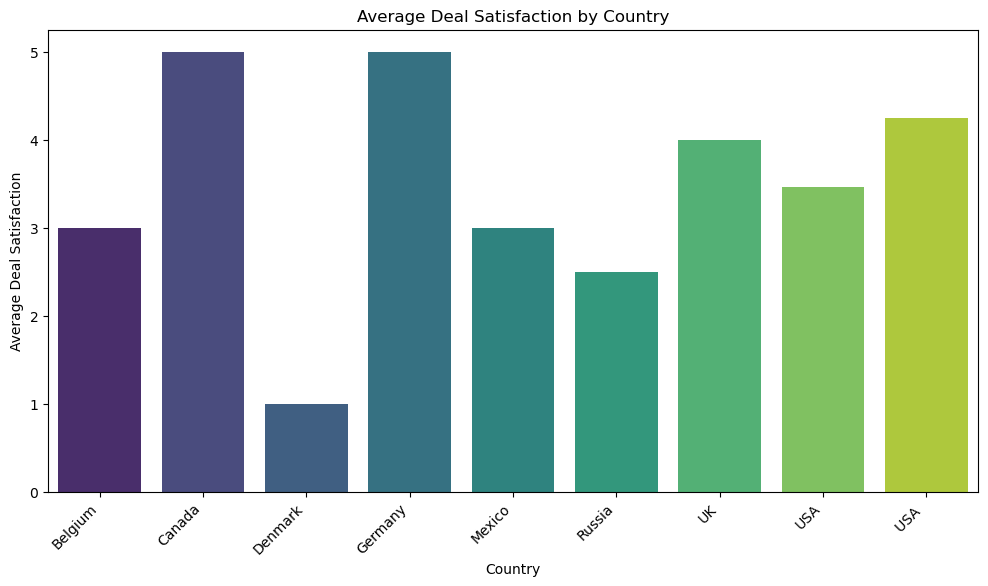

In [38]:

# Group by 'country' and calculate the average deal satisfaction
average_deal_satisfaction_by_country = merged_data.groupby('country')['deal_satisfaction'].mean().reset_index()

# Create a bar plot for average deal satisfaction by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='deal_satisfaction', data=average_deal_satisfaction_by_country, palette='viridis')
plt.title('Average Deal Satisfaction by Country')
plt.xlabel('Country')
plt.ylabel('Average Deal Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


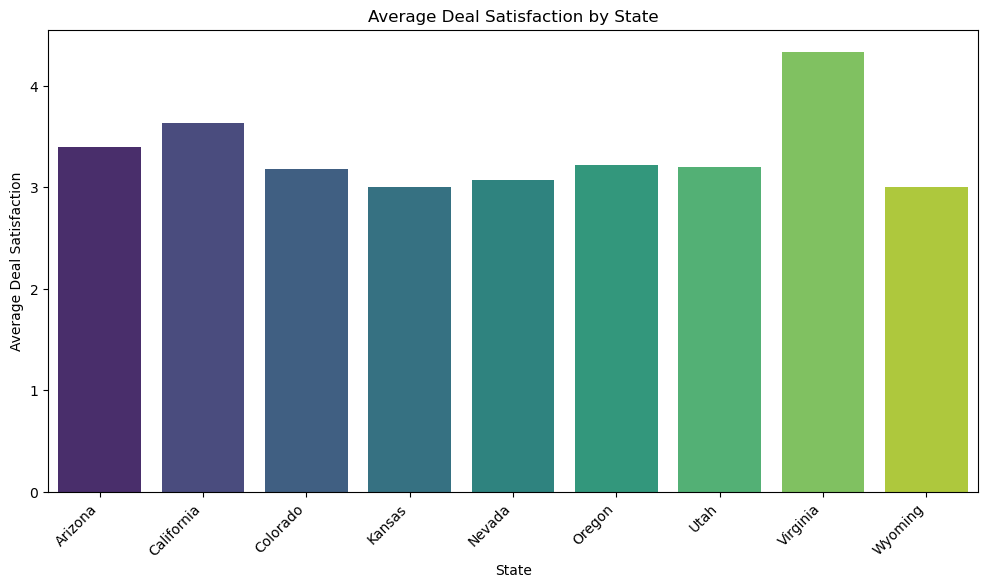

In [39]:
# Group by 'state' and calculate the average deal satisfaction
average_deal_satisfaction_by_state = merged_data.groupby('state')['deal_satisfaction'].mean().reset_index()

# Create a bar plot for average deal satisfaction by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='deal_satisfaction', data=average_deal_satisfaction_by_state, palette='viridis')
plt.title('Average Deal Satisfaction by State')
plt.xlabel('State')
plt.ylabel('Average Deal Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

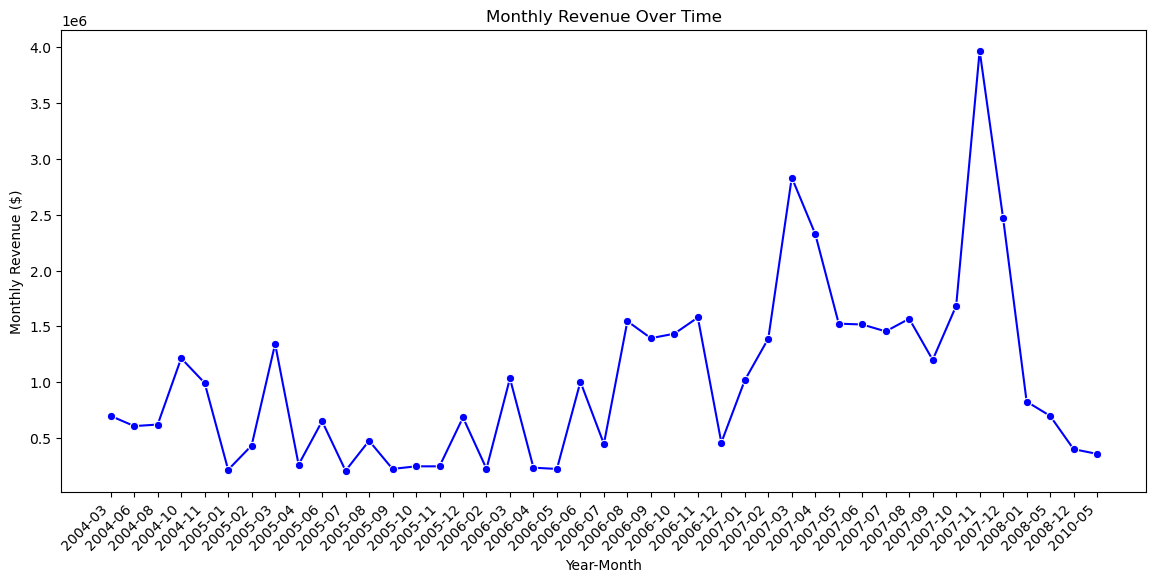

In [40]:
# Convert 'date_sale' to datetime format
merged_data['date_sale'] = pd.to_datetime(merged_data['date_sale'], format='%m/%Y')

# Extract year and month from 'date_sale'
merged_data['year_month'] = merged_data['date_sale'].dt.to_period('M')

# Convert 'year_month' to string for plotting
merged_data['year_month'] = merged_data['year_month'].astype(str)

# Calculate monthly revenue
monthly_revenue = merged_data.groupby('year_month')['price'].sum().reset_index()

# Plotting the time-series graph
plt.figure(figsize=(14, 6))
sns.lineplot(x='year_month', y='price', data=monthly_revenue, marker='o', color='blue')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [41]:
# Find the month with the highest revenue
max_revenue_month = monthly_revenue.loc[monthly_revenue['price'].idxmax()]

# Display the result
print(f"The month with the highest revenue is {max_revenue_month['year_month']} with a revenue of ${max_revenue_month['price']}")


The month with the highest revenue is 2007-11 with a revenue of $3969345.96


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


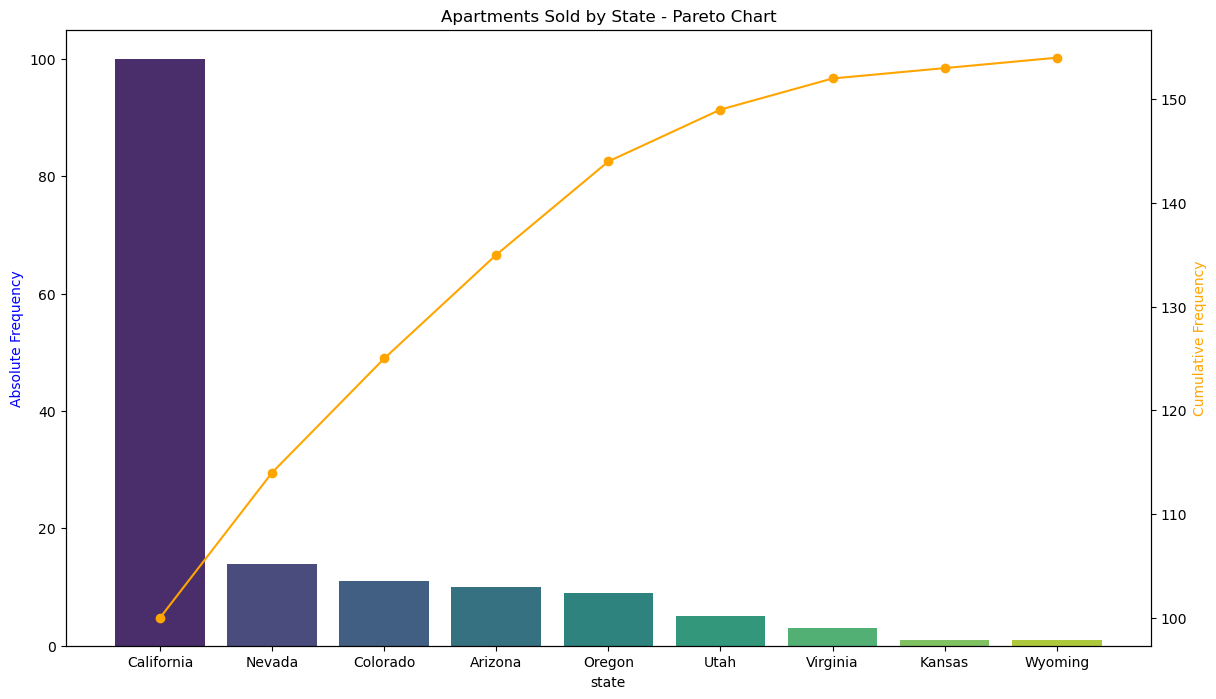

In [42]:
# Count the number of apartments sold in each state
apartments_sold_by_state = merged_data['state'].value_counts().reset_index()
apartments_sold_by_state.columns = ['state', 'absolute_frequency']

# Sort the DataFrame by absolute frequency in descending order
apartments_sold_by_state = apartments_sold_by_state.sort_values(by='absolute_frequency', ascending=False)

# Calculate cumulative frequency
apartments_sold_by_state['cumulative_frequency'] = apartments_sold_by_state['absolute_frequency'].cumsum()

# Create Pareto chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='state', y='absolute_frequency', data=apartments_sold_by_state, palette='viridis')
ax2 = ax.twinx()
ax2.plot(apartments_sold_by_state['state'], apartments_sold_by_state['cumulative_frequency'], color='orange', marker='o')

# Set labels and title
ax.set_ylabel('Absolute Frequency', color='blue')
ax2.set_ylabel('Cumulative Frequency', color='orange')
plt.title('Apartments Sold by State - Pareto Chart')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

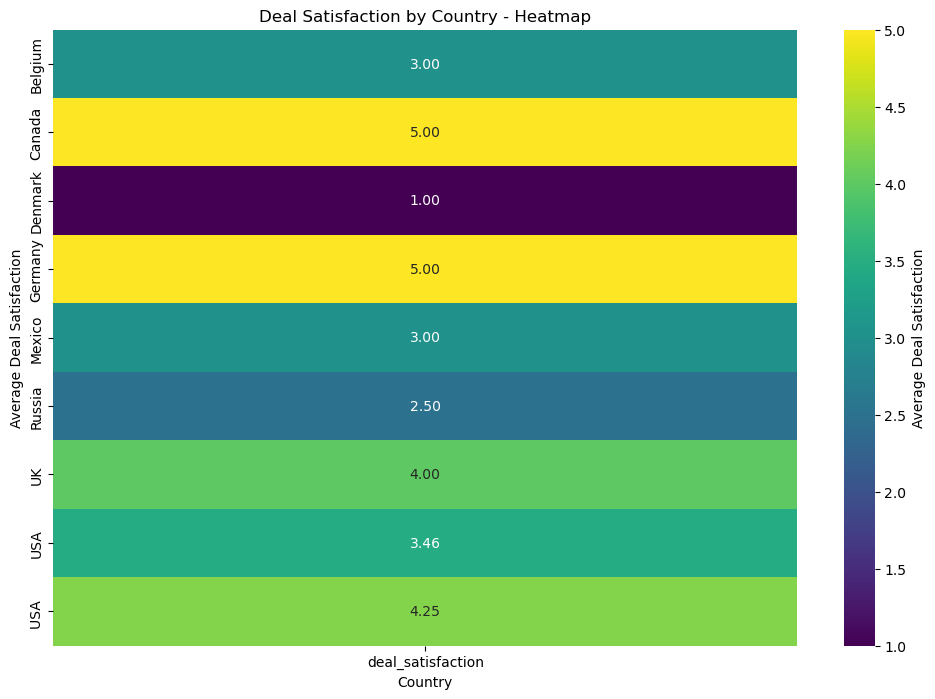

In [43]:
# Group by 'country' and calculate the average deal satisfaction
average_deal_satisfaction_by_country = merged_data.groupby('country')['deal_satisfaction'].mean().reset_index()

# Create a pivot table for creating a heatmap
heatmap_data = average_deal_satisfaction_by_country.pivot_table(index='country', values='deal_satisfaction', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Average Deal Satisfaction'})
plt.title('Deal Satisfaction by Country - Heatmap')
plt.xlabel('Country')
plt.ylabel('Average Deal Satisfaction')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


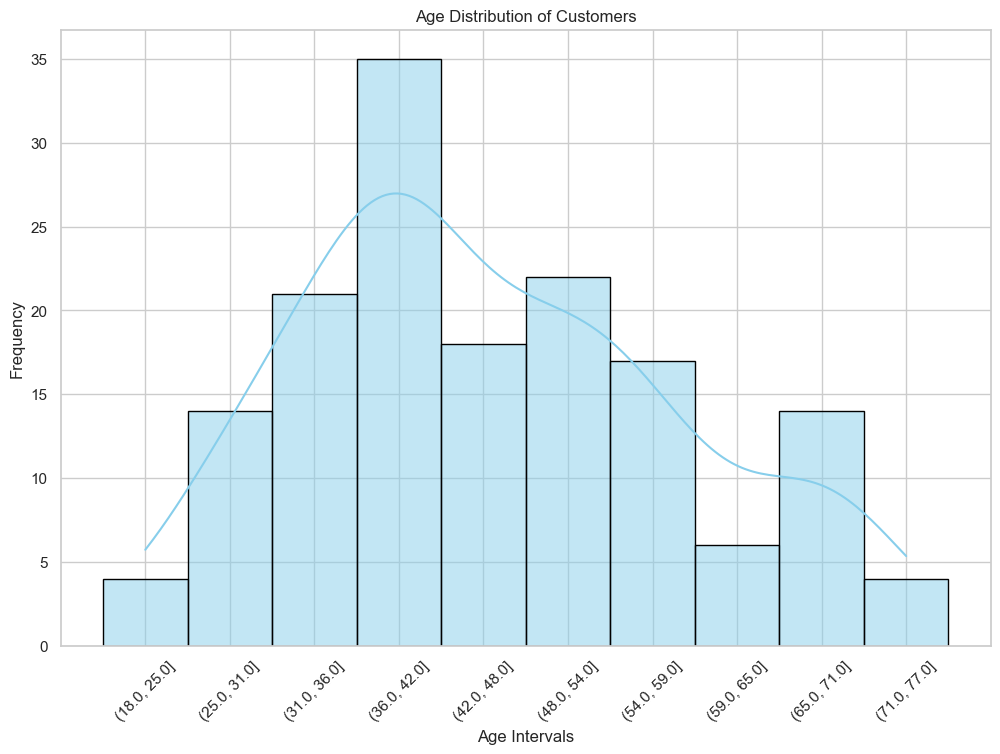

In [44]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the age distribution histogram using the specified age intervals
plt.figure(figsize=(12, 8))
sns.histplot(merged_data['age_interval'], bins=merged_data['age_interval'].nunique(), kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

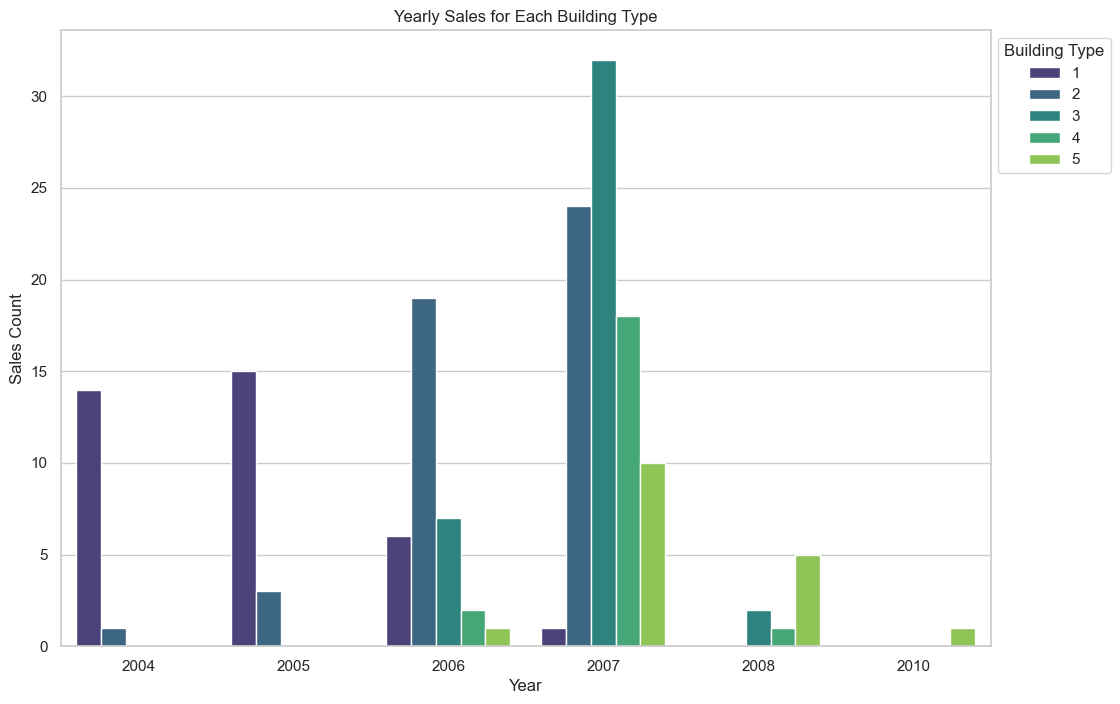

In [49]:
#What are the yearly sales for each building?
#Sales per Year by Building Type – A stacked bar graph showing the yearly sales for each building type
import warnings

# Step 1: Extract Year from the 'date_sale' Column
merged_data['year'] = merged_data['date_sale'].dt.year

# Step 2: Group Data by Year and Building Type
grouped_data = merged_data.groupby(['year', 'building']).size().reset_index(name='sales_count')


# Convert 'building' column to string type
grouped_data['building'] = grouped_data['building'].astype(str)

# Step 3: Create a Stacked Bar Graph
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='sales_count', hue='building', data=grouped_data, palette='viridis')
plt.title('Yearly Sales for Each Building Type')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='Building Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

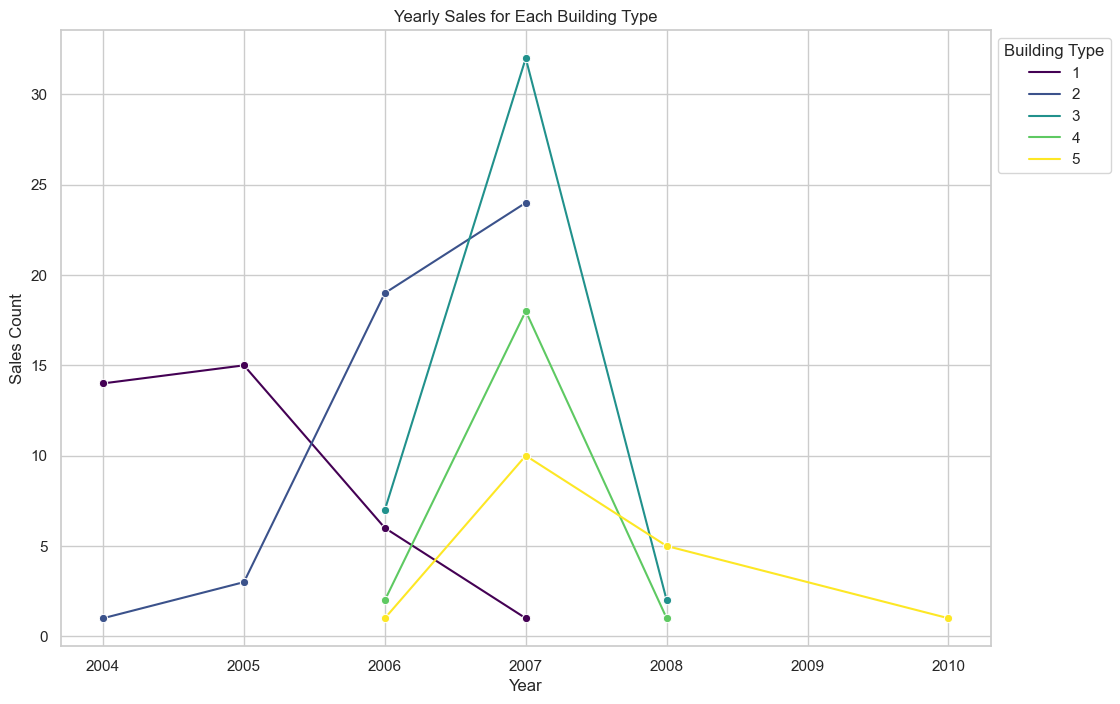

In [50]:
# Step 1: Extract Year from the 'date_sale' Column
merged_data['year'] = merged_data['date_sale'].dt.year

# Step 2: Group Data by Year and Building Type
grouped_data = merged_data.groupby(['year', 'building']).size().reset_index(name='sales_count')

# Step 3: Create a Line Graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='sales_count', hue='building', data=grouped_data, palette='viridis', marker='o')
plt.title('Yearly Sales for Each Building Type')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='Building Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [51]:
#Which customer age bracket has the most buyers potential?
# Calculate the count of buyers in each age bracket
age_bracket_counts = merged_data['age_interval'].value_counts()

# Print the count of buyers in each age bracket
print("Number of Buyers in Each Age Bracket:")
print(age_bracket_counts)

Number of Buyers in Each Age Bracket:
age_interval
(36.0, 42.0]    35
(48.0, 54.0]    22
(31.0, 36.0]    21
(42.0, 48.0]    18
(54.0, 59.0]    17
(25.0, 31.0]    14
(65.0, 71.0]    14
(59.0, 65.0]     6
(18.0, 25.0]     4
(71.0, 77.0]     4
Name: count, dtype: int64


In [52]:
# Find the age interval with the maximum count
most_buyers_age_interval = age_bracket_counts.idxmax()

# Print the result
print("Age Interval with the Most Buyers Potential:", most_buyers_age_interval)

Age Interval with the Most Buyers Potential: (36.0, 42.0]


In [53]:
#What is the most sought after building?
# Calculate the count of sales for each building type
building_counts = merged_data['building'].value_counts()

# Find the most sought-after building
most_sought_after_building = building_counts.idxmax()

# Print the result
print("Most Sought-After Building:", most_sought_after_building)

Most Sought-After Building: 2


In [54]:
# Group data by building type and find the maximum price in each group
highest_priced_building = merged_data.groupby('building')['price'].max()

# Find the building with the highest price
building_with_highest_price = highest_priced_building.idxmax()

# Find the highest price
highest_price = highest_priced_building.max()

# Print the result
print("Highest Priced Building:", building_with_highest_price)
print("Highest Price:", highest_price)

Highest Priced Building: 2
Highest Price: 529317.28


In [55]:
# Assuming 'building type 1' is represented by the value '1' in the 'building' column
average_area_building_type_1 = merged_data[merged_data['building'] == 1]['area'].mean()

# Round to two decimals
average_area_building_type_1_rounded = round(average_area_building_type_1, 2)

print(f"Average area of building type 1: {average_area_building_type_1_rounded} square feet")

Average area of building type 1: 956.3 square feet


In [56]:
# Assuming 'property type' is represented by the 'type' column
most_common_property_type = merged_data['type'].mode()[0]

print(f"The most common property type sold is: {most_common_property_type}")

The most common property type sold is: Apartment


In [57]:
#Which building has the highest average property price?
# Group by 'building' and calculate the average property price
average_price_by_building = merged_data.groupby('building')['price'].mean().reset_index()

# Find the building with the highest average property price
highest_avg_price_building = average_price_by_building.loc[average_price_by_building['price'].idxmax()]['building']
highest_avg_price = average_price_by_building['price'].max()

print(f"The building with the highest average property price is: {highest_avg_price_building}")
print(f"The highest average property price is: {highest_avg_price:.2f}")

The building with the highest average property price is: 1.0
The highest average property price is: 282378.73


In [58]:
#What is the average cost of a building in Mexico?
# Filter data for buildings in Mexico
mexico_buildings = merged_data[merged_data['country'] == 'Mexico']

# Calculate the average cost of a building in Mexico
average_cost_mexico = mexico_buildings['price'].mean()

print(f"The average cost of a building in Mexico is: {average_cost_mexico:.2f}")

The average cost of a building in Mexico is: 338181.18


In [59]:
#Based on the data, which state has the second-highest number of properties sold?
# Group data by state and count the number of properties sold in each state
properties_sold_by_state = merged_data.groupby('state')['propertyNumber'].count().reset_index()

# Sort the data by the number of properties sold in descending order
sorted_properties_sold = properties_sold_by_state.sort_values(by='propertyNumber', ascending=False)

# Extract the state with the second-highest number of properties sold
second_highest_state = sorted_properties_sold.iloc[1]['state']

print(f"The state with the second-highest number of properties sold is: {second_highest_state}")


The state with the second-highest number of properties sold is: Nevada


In [60]:
#Based on the customer demographics, what is the most common age range of property buyers?
# Define the custom age intervals
custom_age_intervals = ['31-36', '36-42', '42-48', '48-54']

# Create a new column with custom age intervals based on the 'age_at_purchase' column
merged_data['custom_age_interval'] = pd.cut(merged_data['age_at_purchase'], bins=[31, 36, 42, 48, 54], labels=custom_age_intervals, right=False)

# Group data by custom age intervals and count the number of buyers in each interval
custom_age_distribution = merged_data.groupby('custom_age_interval')['customerID'].count().reset_index()

# Sort the data by the count of buyers in descending order
sorted_custom_age_distribution = custom_age_distribution.sort_values(by='customerID', ascending=False)

# Extract the most common age range
most_common_custom_age_range = sorted_custom_age_distribution.iloc[0]['custom_age_interval']

print(f"The most common age range of property buyers is: {most_common_custom_age_range}")

The most common age range of property buyers is: 36-42


C:\Users\user\AppData\Local\Temp\ipykernel_10116\3476893326.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  custom_age_distribution = merged_data.groupby('custom_age_interval')['customerID'].count().reset_index()


In [61]:
#Considering you have split the price variable into 10 equal intervals, how many unsold properties are there in the last interval $496,201–$538,272:
# Define the price intervals
price_intervals = pd.cut(merged_data['price'], bins=10)

# Add the price_intervals as a new column in the DataFrame
merged_data['price_interval'] = price_intervals
#print(f"price_intervals",price_intervals)
# Filter the data for the last price interval and count the number of unsold properties
unsold_properties_last_interval = merged_data[(merged_data['price_interval'] == pd.Interval(left=496201, right=538272)) & (merged_data['status'] == 'unsold')]

# Count the number of unsold properties in the last interval
num_unsold_properties_last_interval = len(unsold_properties_last_interval)

print(f"The number of unsold properties in the last interval $496,201–$538,272 is: {num_unsold_properties_last_interval}")

The number of unsold properties in the last interval $496,201–$538,272 is: 0


In [62]:
# Calculate correlation between age and property price
correlation_age_price =round(merged_data['age_at_purchase'].corr(merged_data['price']),2) 

# Display the result
print(f"The correlation between customer's age and property price is: {correlation_age_price}")

The correlation between customer's age and property price is: -0.19


In [63]:
# Find the country with the highest average deal satisfaction
highest_satisfaction_country = average_deal_satisfaction_by_country.loc[
    average_deal_satisfaction_by_country['deal_satisfaction'].idxmax(), 'country'
]

# Print the result
print(f"The country with the highest average deal satisfaction is: {highest_satisfaction_country}")


The country with the highest average deal satisfaction is: Canada


In [64]:
#Which building had the highest sales in 2004 according to the data?
# Filter the data for the year 2004
sales_2004 = merged_data[merged_data['date_sale'].dt.year == 2004]

# Group by building and calculate total sales count
building_sales_2004 = sales_2004.groupby('building').size().reset_index(name='total_sales')

# Find the building with the highest sales in 2004
highest_sales_building_2004 = building_sales_2004.loc[
    building_sales_2004['total_sales'].idxmax(), 'building'
]

# Print the result
print(f"The building with the highest sales in 2004 is: {highest_sales_building_2004}")


The building with the highest sales in 2004 is: 1


In [65]:
# Which of the following states account for 82% of the company revenue?

merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Calculate total revenue for each state
state_revenue = merged_data.groupby('state')['revenue'].sum().reset_index()

# Sort states by total revenue in descending order
state_revenue_sorted = state_revenue.sort_values(by='revenue', ascending=False)

# Calculate cumulative percentage of revenue
state_revenue_sorted['cumulative_percentage'] = state_revenue_sorted['revenue'].cumsum() / state_revenue_sorted['revenue'].sum() * 100

# Identify states contributing to 82% of the total revenue
selected_states = state_revenue_sorted[state_revenue_sorted['cumulative_percentage'] <= 82]

# Display the result
print(selected_states)


        state       revenue  cumulative_percentage
1  California  8.644445e+08              70.747604
4      Nevada  1.223610e+08              80.761838


In [66]:
#Which of the following years brought in the highest revenue?(2004,2007,2008,2009)

merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Calculate total revenue for each year
yearly_revenue = merged_data.groupby(merged_data['date_sale'].dt.year)['revenue'].sum().reset_index()

# Identify the year with the highest revenue
highest_revenue_year = yearly_revenue.loc[yearly_revenue['revenue'].idxmax()]

# Display the result
print("Year with the highest revenue:", highest_revenue_year['date_sale'])

Year with the highest revenue: 2007.0


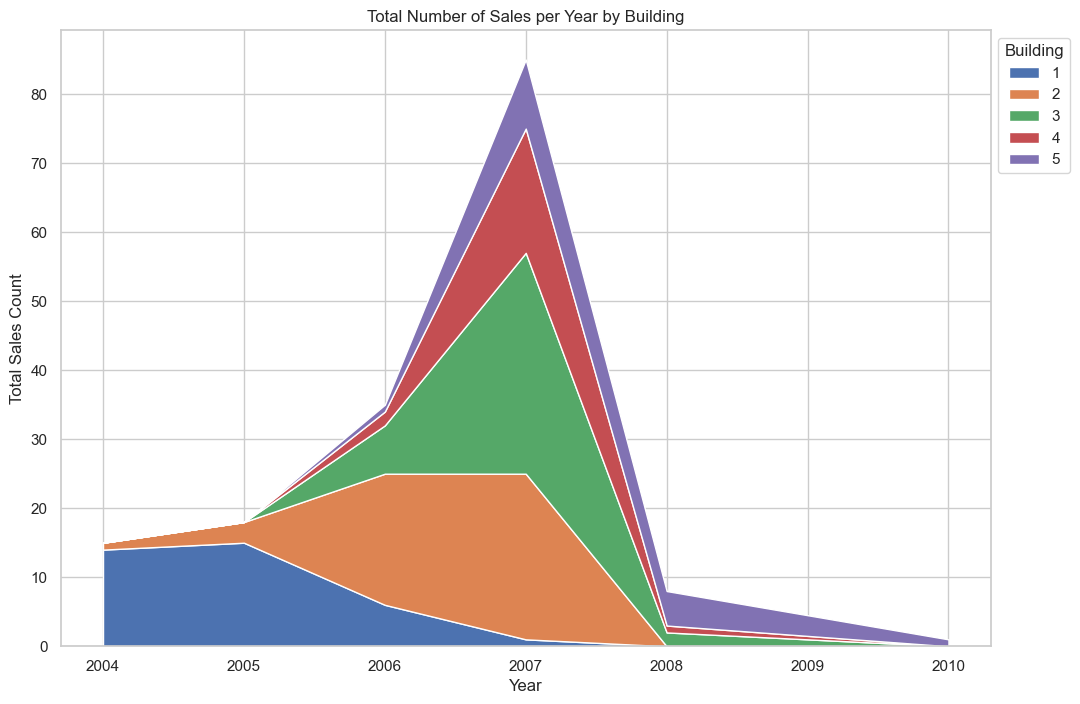

In [67]:

# Extract the year from the 'date_sale' column
merged_data['year'] = merged_data['date_sale'].dt.year

# Group the data by year and building, count the number of sales
grouped_data = merged_data.groupby(['year', 'building']).size().reset_index(name='sales_count')

# Pivot the DataFrame for creating a stacked area chart
pivot_data = grouped_data.pivot_table(index='year', columns='building', values='sales_count', fill_value=0)

# Create a stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=pivot_data.columns)
plt.title('Total Number of Sales per Year by Building')
plt.xlabel('Year')
plt.ylabel('Total Sales Count')
plt.legend(title='Building', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [68]:


# Calculate skewness for each age interval
skewness_by_interval = {}

for interval in merged_data['age_interval'].unique():
    # Select data for the specific interval
    data_for_interval = merged_data.loc[merged_data['age_interval'] == interval, 'age_at_purchase'].dropna()
    
    # Calculate skewness and store in the dictionary
    skewness_by_interval[interval] = skew(data_for_interval)

# Print the skewness values for each interval
for interval, skewness_value in skewness_by_interval.items():
    print(f"Skewness for {interval}: {skewness_value}")


Skewness for (18.0, 25.0]: -0.6520236646847545
Skewness for (25.0, 31.0]: -0.1342005971334075
Skewness for (31.0, 36.0]: 0.27112324227184725
Skewness for (36.0, 42.0]: -0.44276947754146406
Skewness for (42.0, 48.0]: 0.17803185802084498
Skewness for (48.0, 54.0]: 0.5502161543573185
Skewness for (54.0, 59.0]: 0.45574110248527244
Skewness for (59.0, 65.0]: 0.9387234089965416
Skewness for (65.0, 71.0]: 0.8623659124142881
Skewness for (71.0, 77.0]: 1.1547005383792515
Skewness for nan: nan


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [69]:

# Extract numeric data for age from the original dataset
numeric_age_data = merged_data['age_at_purchase'].dropna()

# Calculate skewness for the age data
age_skewness = skew(numeric_age_data)

print(f"Skewness for the age distribution: {age_skewness}")


Skewness for the age distribution: 0.32316971913934733


In [70]:

# Assuming your DataFrame is named merged_data
# Remove 'SRN' column if not already removed
merged_data = merged_data.drop('SRN', axis=1, errors='ignore')

# Calculate revenue for each row
merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Group by state and sum the revenue
revenue_by_state = merged_data.groupby('state')['revenue'].sum()

# Calculate the percentage of total revenue for each state
revenue_percentage = revenue_by_state / revenue_by_state.sum() * 100

# Find the states that account for 82% of the company revenue
selected_states = revenue_percentage[revenue_percentage.cumsum() <= 82]

# Display the result
print("States accounting for 82% of company revenue:")
print(selected_states)


States accounting for 82% of company revenue:
state
Arizona        5.341358
California    70.747604
Colorado       4.777421
Kansas         0.949409
Name: revenue, dtype: float64


In [71]:
# Calculate revenue for each row
merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Group by state and sum the revenue
revenue_by_state = merged_data.groupby('state')['revenue'].sum()

# Calculate the percentage of total revenue for each state
revenue_percentage = revenue_by_state / revenue_by_state.sum() * 100

# States of interest
selected_states = ['California', 'Nevada', 'Colorado']

# Filter the results for the selected states
selected_states_revenue = revenue_percentage.loc[selected_states]

# Display the result
print("Percentage of revenue for California, Nevada, and Colorado:")
print(selected_states_revenue)


Percentage of revenue for California, Nevada, and Colorado:
state
California    70.747604
Nevada        10.014234
Colorado       4.777421
Name: revenue, dtype: float64


In [72]:
# Calculate the total percentage of revenue for California, Nevada, and Colorado
total_percentage = revenue_by_state.loc[['California', 'Nevada', 'Colorado']].sum() / revenue_by_state.sum() * 100

# Display the total percentage as a formatted string
print("Total percentage of revenue for California, Nevada, and Colorado: {:.3f}%".format(total_percentage))



Total percentage of revenue for California, Nevada, and Colorado: 85.539%


In [73]:
# Calculate revenue for each row
merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Group by state and sum the revenue
revenue_by_state = merged_data.groupby('state')['revenue'].sum()

# Calculate the percentage of total revenue for each state
revenue_percentage = revenue_by_state / revenue_by_state.sum() * 100

# States of interest
selected_states = ['California', 'Nevada', 'Oregon', ]

# Filter the results for the selected states
selected_states_revenue = revenue_percentage.loc[selected_states]

# Display the result
print("Percentage of revenue for California, Nevada, and Oregon :")
print(selected_states_revenue)

# Calculate the total percentage of revenue for California, Nevada, Oregon
total_percentage = selected_states_revenue.sum()

# Display the total percentage as a formatted string
print("Total percentage of revenue for California, Nevada, and Oregon : {:.3f}%".format(total_percentage))


Percentage of revenue for California, Nevada, and Oregon :
state
California    70.747604
Nevada        10.014234
Oregon         4.122254
Name: revenue, dtype: float64
Total percentage of revenue for California, Nevada, and Oregon : 84.884%


In [74]:
# Calculate revenue for each row
merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Group by state and sum the revenue
revenue_by_state = merged_data.groupby('state')['revenue'].sum()

# Calculate the percentage of total revenue for each state
revenue_percentage = revenue_by_state / revenue_by_state.sum() * 100

# States of interest
selected_states = ['Nevada', 'Colorado']

# Filter the results for the selected states
selected_states_revenue = revenue_percentage.loc[selected_states]

# Display the result
print("Percentage of revenue for Nevada and Colorado:")
print(selected_states_revenue)

# Calculate the total percentage of revenue for Nevada and Colorado
total_percentage = round(selected_states_revenue.sum(),2)

# Display the total percentage as a formatted string
print("Total percentage of revenue for Nevada and Colorado: {:.3f}%".format(total_percentage))


Percentage of revenue for Nevada and Colorado:
state
Nevada      10.014234
Colorado     4.777421
Name: revenue, dtype: float64
Total percentage of revenue for Nevada and Colorado: 14.790%


In [75]:
# Calculate revenue for each row
merged_data['revenue'] = merged_data['propertyNumber'] * merged_data['price']

# Group by state and sum the revenue
revenue_by_state = merged_data.groupby('state')['revenue'].sum()

# Calculate the percentage of total revenue for each state
revenue_percentage = revenue_by_state / revenue_by_state.sum() * 100

# States of interest
selected_states = ['Utah', 'Nevada', 'Colorado']

# Filter the results for the selected states
selected_states_revenue = revenue_percentage.loc[selected_states]

# Display the result
print("Percentage of revenue for Utah, Nevada, and Colorado:")
print(selected_states_revenue)

# Calculate the total percentage of revenue for Utah, Nevada, and Colorado
total_percentage = selected_states_revenue.sum()

# Display the total percentage as a formatted string
print("Total percentage of revenue for Utah, Nevada, and Colorado: {:.3f}%".format(total_percentage))


Percentage of revenue for Utah, Nevada, and Colorado:
state
Utah         3.030736
Nevada      10.014234
Colorado     4.777421
Name: revenue, dtype: float64
Total percentage of revenue for Utah, Nevada, and Colorado: 17.822%


The building with a significant decrease in sales is Building nan


C:\Users\user\AppData\Local\Temp\ipykernel_10116\2349783152.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  building_with_decrease = sales_by_building_year.pct_change().idxmin(axis=1).iloc[0]
C:\Users\user\AppData\Local\Temp\ipykernel_10116\2349783152.py:20: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  building_with_decrease = sales_by_building_year.pct_change().idxmin(axis=1).iloc[0]


<Figure size 1200x800 with 0 Axes>

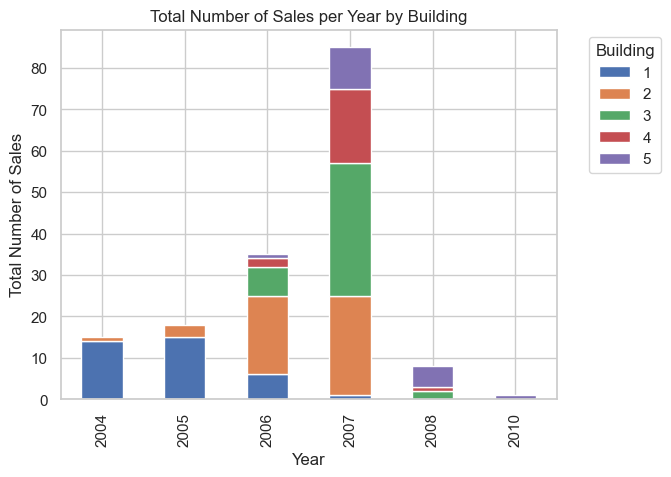

In [78]:
# Assuming your DataFrame is named merged_data
# Convert 'date_sale' to datetime format
merged_data['date_sale'] = pd.to_datetime(merged_data['date_sale'])

# Extract the year from the 'date_sale' column
merged_data['year'] = merged_data['date_sale'].dt.year

# Group by 'year' and 'building' to calculate the total number of sales
sales_by_building_year = merged_data.groupby(['year', 'building']).size().unstack()

# Plot the total number of sales per year by building
plt.figure(figsize=(12, 8))
sales_by_building_year.plot(kind='bar', stacked=True)
plt.title('Total Number of Sales per Year by Building')
plt.xlabel('Year')
plt.ylabel('Total Number of Sales')
plt.legend(title='Building', bbox_to_anchor=(1.05, 1), loc='upper left')

# Find the building with a significant decrease in sales
building_with_decrease = sales_by_building_year.pct_change().idxmin(axis=1).iloc[0]
print(f"The building with a significant decrease in sales is Building {building_with_decrease}")

# Show the plot
plt.show()


In [79]:
# Assuming your DataFrame is named merged_data
# Convert 'date_sale' to datetime format
merged_data['date_sale'] = pd.to_datetime(merged_data['date_sale'])

# Extract the year from the 'date_sale' column
merged_data['year'] = merged_data['date_sale'].dt.year

# Group by 'year' and 'building' to calculate the total number of sales
sales_by_building_year = merged_data.groupby(['year', 'building']).size().unstack()

# Calculate the percentage change in sales for each building
percentage_change = sales_by_building_year.pct_change()

# Identify the building with the minimum percentage change
building_with_decrease = percentage_change.min().idxmin()

# Print the building with a significant decrease in sales
print(f"The building with a significant decrease in sales is Building {building_with_decrease}")


The building with a significant decrease in sales is Building 4


C:\Users\user\AppData\Local\Temp\ipykernel_10116\1207926930.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percentage_change = sales_by_building_year.pct_change()


In [80]:
# Assuming your DataFrame is named merged_data
# Totals breakdown by state
columns_totals_state = ['state', 'mortgage', 'price', 'sex']
totals_by_state = merged_data[columns_totals_state].groupby('state').agg({
    'mortgage': 'count',  # Count the number of entries for each state
    'price': 'sum',  # Calculate the total price for each state
    'sex': lambda x: x.value_counts().idxmax() if not x.empty else None  # Get the mode (most common) value for 'sex'
}).rename(columns={'mortgage': 'total_properties'})

# Calculate the cumulative frequency
totals_by_state['cumulative_frequency'] = totals_by_state['total_properties'].cumsum()
# Calculate the absolute frequency
absolute_frequency = merged_data['state'].value_counts()

# Display the breakdown by state with absolute frequency and cumulative frequency
print("\nTotals Breakdown by State:")
print(totals_by_state)

print("\nabsolute_frequency:")
print(absolute_frequency)



Totals Breakdown by State:
            total_properties        price sex  cumulative_frequency
state                                                              
Arizona                   10   2543965.20   M                    10
California               100  28415287.60   M                   110
Colorado                  11   2570287.08   M                   121
Kansas                     1    252185.99   M                   122
Nevada                    14   3858206.74   M                   136
Oregon                     9   2149158.40   F                   145
Utah                       5   1188776.40   M                   150
Virginia                   3    648055.92   F                   153
Wyoming                    1    204286.67   M                   154

absolute_frequency:
state
California    100
Nevada         14
Colorado       11
Arizona        10
Oregon          9
Utah            5
Virginia        3
Kansas          1
Wyoming         1
Name: count, dtype: int64


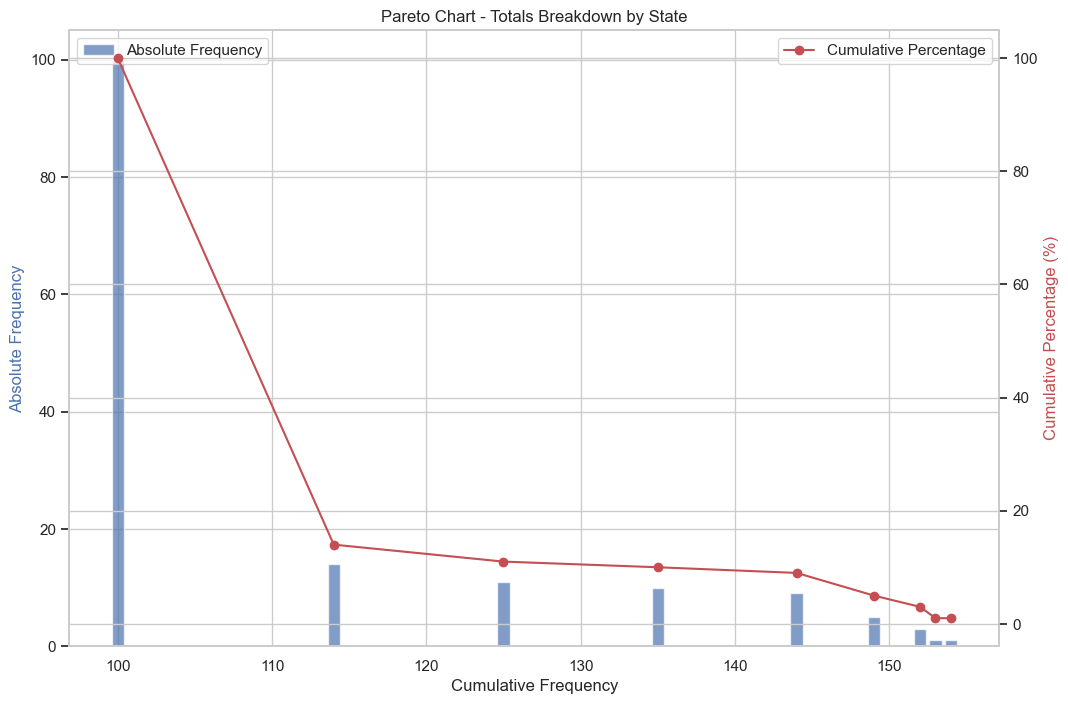

In [81]:
# Provided data
data = {
    'state': ['California', 'Nevada', 'Colorado', 'Arizona', 'Oregon', 'Utah', 'Virginia', 'Kansas', 'Wyoming'],
    'absolute_frequency': [100, 14, 11, 10, 9, 5, 3, 1, 1],
    'price': [28415287.60, 3858206.74, 2570287.08, 2543965.20, 2149158.40, 1188776.40, 648055.92, 252185.99, 204286.67],
    'sex': ['M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M'],
    'cumulative_frequency': [100, 114, 125, 135, 144, 149, 152, 153, 154]
}

# Create DataFrame
totals_by_state = pd.DataFrame(data)
absolute_frequency = totals_by_state.set_index('cumulative_frequency')['absolute_frequency']

# Sort the DataFrame by total properties in descending order
totals_by_state_sorted = totals_by_state.sort_values(by='cumulative_frequency', ascending=True)

# Plot the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for absolute frequency
ax1.bar(absolute_frequency.index, absolute_frequency, color='b', alpha=0.7, label='Absolute Frequency')

# Line plot for cumulative percentage on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(totals_by_state_sorted['cumulative_frequency'], totals_by_state_sorted['absolute_frequency'], color='r', marker='o', label='Cumulative Percentage')

# Set labels and title
ax1.set_xlabel('Cumulative Frequency')
ax1.set_ylabel('Absolute Frequency', color='b')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
plt.title('Pareto Chart - Totals Breakdown by State')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [82]:
print(merged_data.columns)

Index(['building', 'date_sale', 'type', 'propertyNumber', 'area', 'price',
       'status', 'customerID', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source', 'age_at_purchase', 'age_interval', 'year_month', 'year',
       'custom_age_interval', 'price_interval', 'revenue'],
      dtype='object')
